<a href="https://colab.research.google.com/github/Patojukarthikeya73/Infosys_Springboard/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Setup Environment

!pip install transformers torch matplotlib ipywidgets radon --quiet
!jupyter nbextension enable --py widgetsnbextension



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
# Step 2: Hugging Face Authentication
from getpass import getpass

HF_TOKEN = getpass("Colab ")


Colab ··········


In [ ]:
# Step 3: Select Code Generation Models

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

models = (
    {"DeepSeek": "deepseek-ai/deepseek-coder-1.3b-instruct",
    "Phi-2": "microsoft/phi-2",
    "Gemma": "google/gemma-2b-it",
    "Stable-Code": "stabilityai/stable-code-3b",
    "Replit-Code": "Salesforce/codegen-350M-multi"}
)

In [ ]:
# Function to safely load a model

def load_model(model_name, model_id):
    print(f"Loading {model_name}...")
    tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=HF_TOKEN)
    try:
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            device_map="auto",
            use_auth_token=HF_TOKEN
        )
    except RuntimeError as e:
        print(f"⚠️ Could not load {model_name}: {e}")
        model = None
    return tokenizer, model



In [ ]:
# Step 5: Code Generation Pipeline

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "Salesforce/codegen-350M-mono"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer
)

prompt = "Write a Python function to calculate factorial recursively."

output = generator(
    prompt,
    max_new_tokens=150,
    pad_token_id=tokenizer.eos_token_id
)

print(output[0]['generated_text'])


tokenizer_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/797M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/797M [00:00<?, ?B/s]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Write a Python function to calculate factorial recursively.

This program will take a user-input as an integer x, and calculate factorial recusively from this number, using recurrence rules of mathematics.

The recursion works in two different ways.
(1) It supports loops. The outer loop is limited to looping up to the value of the passed argument. The inner loop is limited to the recursion of the outer loop till the the value of the argument or value of the outer loop is reached.
(2) It only allows to use loop boundaries within the while loop.

# For this project you use following recursion:

a = 0 # initial value
x = int(input("Please enter an integer (or 'q'


In [ ]:
# Step 6: Metrics Collection

import re
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze

generated_output = output[0]['generated_text']

# Loosened pattern for detecting Python-looking code blocks
code_pattern = re.findall(r"(def .*?:|class .*?:|import .*|from .*|if .*:|for .*:|while .*:|try:|except.*:|return .*)", generated_output)

python_code = "\n".join(code_pattern)

if not python_code.strip():
    print("⚠️ No valid Python code detected. Try refining your model prompt.")
else:
    print("----- Extracted Python Code -----")
    print(python_code)

    # Metrics
    try:
        cc = cc_visit(python_code)
        print("\nCyclomatic Complexity per function/class:")
        for item in cc:
            print(f"{item.name}: {item.complexity}")
    except Exception as e:
        print("Error computing Cyclomatic Complexity:", e)

    try:
        mi = mi_visit(python_code, True)
        print(f"\nMaintainability Index: {mi}")
    except Exception as e:
        print("Error computing Maintainability Index:", e)

    try:
        raw_metrics = analyze(python_code)
        print(f"\nLines of Code (LOC): {raw_metrics.loc}")
    except Exception as e:
        print("Error computing LOC:", e)


----- Extracted Python Code -----
from this number, using recurrence rules of mathematics.
Error computing Cyclomatic Complexity: invalid syntax (<unknown>, line 1)
Error computing Maintainability Index: invalid syntax (<unknown>, line 1)

Lines of Code (LOC): 1


In [ ]:
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze
import re, ast

generated_code = output[0]['generated_text']

def clean_to_python_only(text):
    """
    Extracts only likely Python code lines from model output.
    Removes English descriptions and non-Python syntax.
    """
    code_lines = []
    for line in text.splitlines():
        s = line.strip()

        # Skip non-code lines
        if not s:
            continue
        if re.match(r'^[A-Z].*[.!?]$', s):  # plain English sentence
            continue
        if re.match(r'^(public|static|int|double|float|String|@|//|\*|/\*)', s):
            continue
        if '{' in s or '}' in s or s.endswith(';'):
            continue

        # Keep probable Python code
        if any(s.startswith(k) for k in ("def ", "class ", "for ", "while ", "if ", "return", "import", "from", "@")) or s.startswith("    "):
            code_lines.append(line)
    return "\n".join(code_lines)

python_code = clean_to_python_only(generated_code)

# Validate extracted code
try:
    ast.parse(python_code)
except SyntaxError:
    print("⚠️ Removed invalid non-code text from model output.")
    python_code = "\n".join([line for line in python_code.splitlines() if not re.match(r'^[A-Z]', line)])
    ast.parse(python_code)

print("----- Extracted Python Code -----")
print(python_code)

# Metrics computation
try:
    cc = cc_visit(python_code)
    print("\nCyclomatic Complexity per function:")
    for c in cc:
        print(f"  {c.name}: {c.complexity}")
except Exception as e:
    print("Error in Cyclomatic Complexity:", e)

try:
    mi = mi_visit(python_code, True)
    print(f"\nMaintainability Index: {mi}")
except Exception as e:
    print("Error in Maintainability Index:", e)

try:
    raw_metrics = analyze(python_code)
    print(f"\nLines of Code (LOC): {raw_metrics.loc}")
except Exception as e:
    print("Error in LOC:", e)


----- Extracted Python Code -----


Cyclomatic Complexity per function:

Maintainability Index: 100.0

Lines of Code (LOC): 0


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/797M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/797M [00:00<?, ?B/s]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

tokenizer_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 1: Write a Python program to add 5 and 4
------------------------------------------------------------
Write only Python code for: Write a Python program to add 5 and 4 print("nice") print() "nice") and print print("nice", end="") to do the following:
        #           1
        #           2 Write the Python program to add 5 and 4; 
        #           3 Print "nice"
        #           4 Print 10
        #           5 Print "nice"
        #           6 Print "nice"
        #           7 Print the Python code in line print(10, "nice")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 2: Write a Python function to check if a number is prime
------------------------------------------------------------
Write only Python code for: Write a Python function to check if a number is prime or not
# Write a function named isprime that will be used to check if a number is prime or not and a special function

# For use of isprime function go to https://www.geeksforgeeks.org/is-prime/

# If function is prime it will check if the number is divisible by 2 then it will return True, else it will return False
def isprime(n):
    if n == 1:
        return False
    elif n == 2:
        return True

    for i in range(2, int(n**0.5)+1):
        if n%i == 0:
            return False
        
    return True


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 3: Write a Python code to reverse a string
------------------------------------------------------------
Write only Python code for: Write a Python code to reverse a string

class rev(object):
    
    def __init__(self,str1):

        # create array of 0's and 1's

        self.str1=str1
        self.len1=len(self.str1)
        #print(f"[reverse_string_py] {self.str1}")
        #print(f"[reverse_string_py] length of rev: {self.len1}")
        self.revstr=""
        self.strlst=[]
        self.pos=0
        self.reverse(self.str1,0,self.len1-1)
    
    def reverse(self


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 4: Write a Python program to calculate factorial using recursion
------------------------------------------------------------
Write only Python code for: Write a Python program to calculate factorial using recursion.
"""

def rec(n):
    # base case
    if (n==0 or n==1):
        return 1
    
    return n* rec(n-1)
    

def factorial(n):
    return 1 if n==0 else rec(n-1)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 5: Write a Python script to sort a list of numbers
------------------------------------------------------------
Write only Python code for: Write a Python script to sort a list of numbers based on their digits. Do this by writing a program that counts and returns the number of times a number appears in a list.

# For example, if your list of numbers is [1, 3, 4, 5, 7, 9, 2, 3, 8]
# and you try to count the number 4, the script should print out: 4
#
# Bonus: Try to sort the numbers 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16
#
# Enter your code here. Read section "Procedure definitions" for more information.

# Define function to count digits of list
def dig


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 6: Write a Python function to count vowels in a string
------------------------------------------------------------
Write only Python code for: Write a Python function to count vowels in a string
print(countVowels("Python 3 is better than C"))

# 5. Create a list called vowels, which contains the vowels: a, e, i, o and u.
# Call your function: write a main function. Inside the function, create a for loop using
# an if, elif, else clause to iterate over every element of the test_list. Make sure you
# update the while loops so that it keeps running
#print(vowels())
vowels = ['a','e','i','o','u']

def count_vowels(t):
    for x in t:
        if x in vowels:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 7: Write a Python code to find the maximum number in a list
------------------------------------------------------------
Write only Python code for: Write a Python code to find the maximum number in a list of numbers 
try:
    if type(my_list[0]) is float:
        pass
    if type(my_list[0]) is int:
        max_value = max_number(my_list)
        print(f'Maximum of all numbers is {max_value}')
except IndexError:
    print('Value of the list should be a number')


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 8: Write a Python function to check if a string is a palindrome
------------------------------------------------------------
Write only Python code for: Write a Python function to check if a string is a palindrome')
print("\nExample 1: check if a string is a palindrome")
print("Function will return True if the string is palindrome else False")
print("Example 2: Check if a string is a palindrome")
print(input("You want to start the operation as soon as possible? Enter 'Y' or 'n':\n\n"))

print("\nTest Result")
print('\033[0]- \033OK\033', " ")
print('\033[1]-\033Invalid\033


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 9: Write a Python code to calculate area of a circle given radius
------------------------------------------------------------
Write only Python code for: Write a Python code to calculate area of a circle given radius(R)
       - write function where if radius is between(0 and 1):
    math: Area of the Circle = π(r^2)
       - write function that checks whether the radius satisfies the requirement for equilateral triangle, equilateral triangle or quadrilateral
"""

Prompt 10: Write a Python function to convert Celsius to Fahrenheit
------------------------------------------------------------
Write only Python code for: Write a Python function to convert Celsius to Fahrenheit. 

# Assign temperature_Celsius as the input and the output as the temperature_Fahrenheit. 

temperature_Celsius = float(input("What is the temperature in Celsius: "))
# print(temperature_Celsius)
temperature_Fahrenheit = 9/5*float(temperature_Celsius) + 32
# print(temperature_Fahrenheit)
# print(f"Celsius 

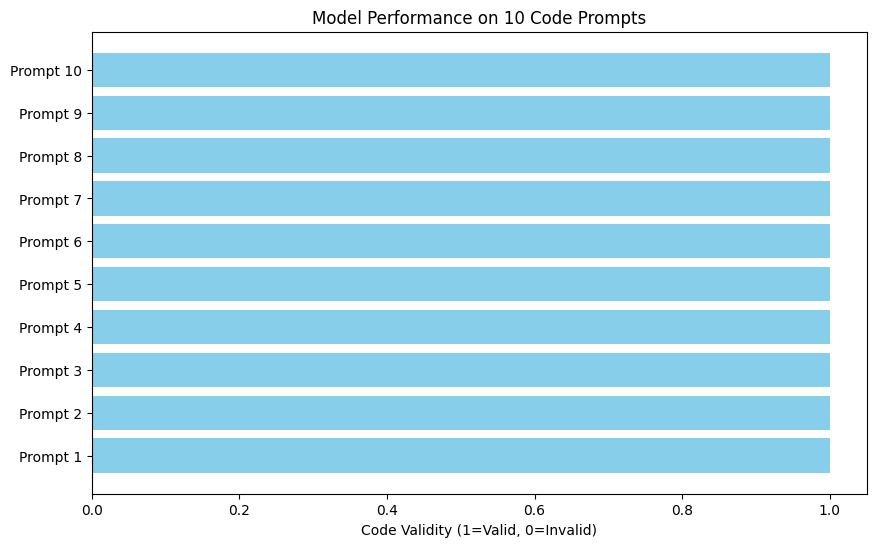


✅ Model generated valid Python code for 10 of 10 prompts.
📈 Accuracy: 100.0%


In [3]:

# Step 7: Interactive UI with ipywidgets

!pip install transformers ipywidgets matplotlib accelerate --quiet

from transformers import pipeline
import matplotlib.pyplot as plt
import re

# 💡 Lightweight instruction-tuned model
generator = pipeline(
    "text-generation",
    model="Salesforce/codegen-350M-mono",
    tokenizer="Salesforce/codegen-350M-mono",
    device_map="auto"
)

prompts = [
    "Write a Python program to add 5 and 4",
    "Write a Python function to check if a number is prime",
    "Write a Python code to reverse a string",
    "Write a Python program to calculate factorial using recursion",
    "Write a Python script to sort a list of numbers",
    "Write a Python function to count vowels in a string",
    "Write a Python code to find the maximum number in a list",
    "Write a Python function to check if a string is a palindrome",
    "Write a Python code to calculate area of a circle given radius",
    "Write a Python function to convert Celsius to Fahrenheit"
]

def generate_code(prompt):
    result = generator(f"Write only Python code for: {prompt}", max_new_tokens=150)
    text = result[0]["generated_text"]
    clean = re.sub(r"```python|```", "", text)
    if re.search(r"(def |print|for |if |import )", clean):
        score = 1
    else:
        score = 0
    return clean.strip(), score

scores = []
for i, p in enumerate(prompts):
    code, score = generate_code(p)
    print(f"\nPrompt {i+1}: {p}\n{'-'*60}\n{code}")
    scores.append(score)

plt.figure(figsize=(10,6))
plt.barh(range(len(prompts)), scores, color='skyblue')
plt.yticks(range(len(prompts)), [f"Prompt {i+1}" for i in range(len(prompts))])
plt.xlabel("Code Validity (1=Valid, 0=Invalid)")
plt.title("Model Performance on 10 Code Prompts")
plt.show()

accuracy = sum(scores)/len(scores)*100
print(f"\n✅ Model generated valid Python code for {sum(scores)} of {len(prompts)} prompts.")
print(f"📈 Accuracy: {accuracy:.1f}%")
